### Investigating memory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qnmfitsrd.qnm import qnm
qnm = qnm()

import qnmfitsrd as qnmfits

sim = qnmfits.SXS(ID=305, zero_time=(2,2))

/data/rvnd2/python_envs/python-3.11-clone/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


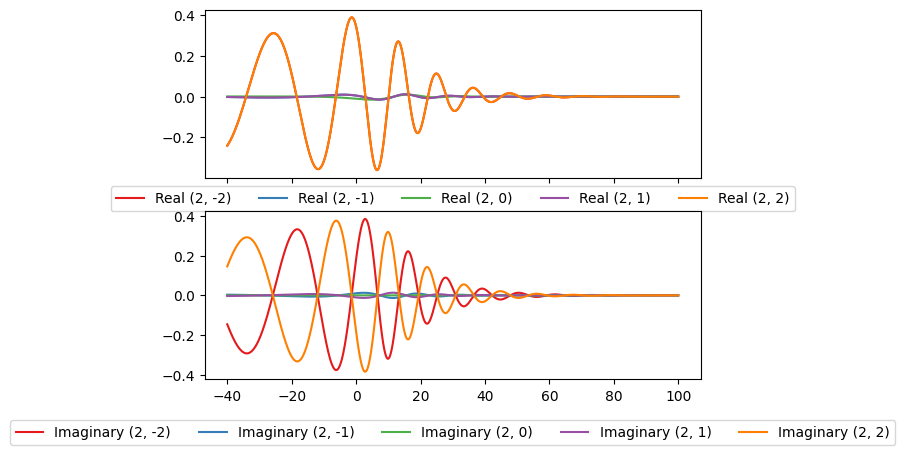

In [2]:
import seaborn as sns

plot_mask = (sim.times > -40) & (sim.times < 100)

fig, axs = plt.subplots(2, sharex=True)

num_colors = len(sim.h)

palette = sns.color_palette("Set1", num_colors)

for i, mode in enumerate(sim.h):
    if mode[0] > 2:
        continue
    axs[0].plot(sim.times[plot_mask], np.real(sim.h[mode])[plot_mask], color=palette[i], label=f'Real {mode}') 
    axs[1].plot(sim.times[plot_mask], np.imag(sim.h[mode])[plot_mask], color=palette[i], label=f'Imaginary {mode}')  

axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=num_colors)  
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=num_colors) 

plt.show()

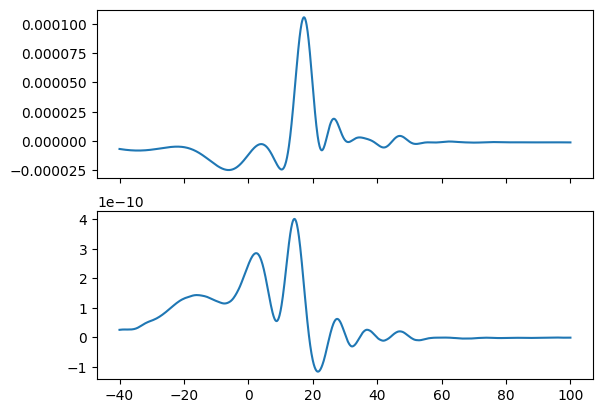

In [3]:
plot_mask = (sim.times > -40) & (sim.times < 100)

fig, axs = plt.subplots(2, sharex=True)    

axs[0].plot(sim.times[plot_mask], np.real(sim.h[4,0])[plot_mask]) 
axs[1].plot(sim.times[plot_mask], np.imag(sim.h[4,0])[plot_mask])  

In [4]:
modes = [(4,4,n,p) for n in range(4) for p in [-1,1]] + [(2,2,0,1,2,-2,0,-1)]

best_fit = qnmfits.multi_multimode_ringdown_fit(
    sim.times,
    sim.h,
    modes,
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
)

qnmfits.plot_mode_amplitudes(
    best_fit['C'], best_fit['mode_labels'], log=False)

plt.semilogy()

qnmfits.plot_ringdown(
    sim.times,
    sim.h,
    best_fit=best_fit,
    spherical_mode=(4,4)
)

AttributeError: module 'qnmfitsrd' has no attribute 'multi_multimode_ringdown_fit'